In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import os
from os.path import isfile, join
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [38]:
img_folder = "imgs/"

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 22})
if not os.path.exists('imgs'):
    os.makedirs('imgs')

In [39]:
data_path = 'Data1'
data_files = [join(data_path, f) for f in listdir(data_path) if isfile(join(data_path, f))]
print(data_files)

['Data1/energy_consumption_it_1.csv', 'Data1/energy_consumption_it_7.csv', 'Data1/energy_consumption_it_8.csv', 'Data1/energy_consumption_it_6.csv', 'Data1/energy_consumption_it_11.csv', 'Data1/energy_consumption_it_2.csv', 'Data1/energy_consumption_it_10.csv', 'Data1/energy_consumption_it_3.csv', 'Data1/energy_consumption_it_4.csv', 'Data1/energy_consumption_it_0.csv', 'Data1/energy_consumption_it_14.csv', 'Data1/energy_consumption_it_5.csv', 'Data1/energy_consumption_it_15.csv', 'Data1/energy_consumption_it_13.csv', 'Data1/energy_consumption_it_12.csv', 'Data1/energy_consumption_it_9.csv']


In [40]:
data = [pd.read_csv(fname) for fname in data_files]

In [41]:
data[0]

,Device ID,Time,Consumption
0,2,0.016258,0.341139
1,1,229.000000,0.114743
2,3,0.016439,0.341152
3,1,0.434000,0.127941
4,4,0.016130,0.341130
5,1,0.633000,0.140753
6,5,0.016768,0.341174
7,1,0.835000,0.153757
8,6,0.016240,0.341138
9,1,1.034000,0.166569


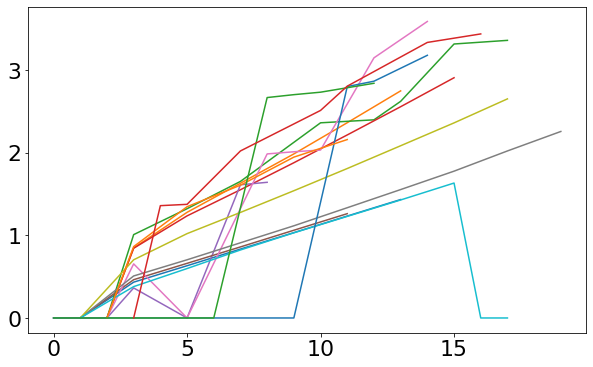

In [86]:
to_remove = []
host_time = [sample.query('`Device ID` == 1')['Time'] for sample in data]
for i in range(len(host_time)):
    to_plot = host_time[i]
    to_plot[to_plot > 10] = 0
    if (to_plot == 0).all() or len(to_plot) > 10:
        to_remove.append(i)
        continue
    to_plot.plot()
for index in sorted(to_remove, reverse=True):
    del host_time[index]

[]

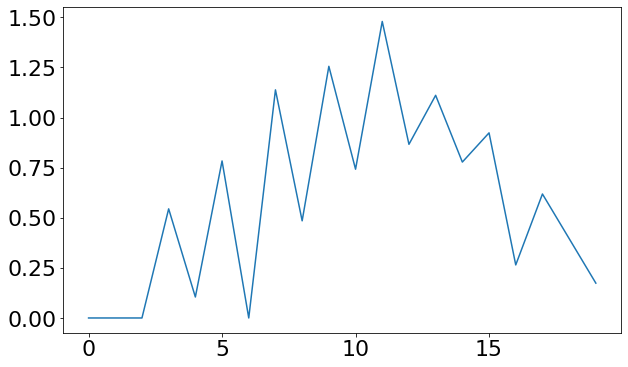

In [88]:
time_combined = host_time[0]
for series in host_time[1:]:
    time_combined = time_combined.add(series, fill_value=0)
time_combined = time_combined.divide(len(host_time[1:]))
time_combined.plot()
plt.plot()

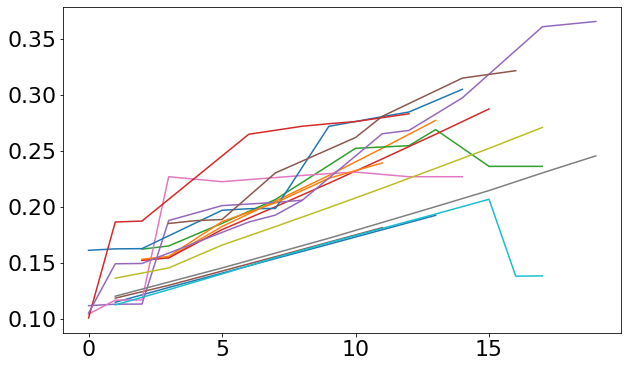

In [83]:
to_remove = []
host_consumption = [sample.query('`Device ID` == 1')[' Consumption'] for sample in data]
for i in range(len(host_consumption)):
    to_plot = host_consumption[i]
    if i < 7:
        to_plot[to_plot > 0.3] = np.mean(to_plot)
    
    if (to_plot == 0).all() or len(to_plot) > 15:
        to_remove.append(i)
        continue
    to_plot.plot()
for index in sorted(to_remove, reverse=True):
    del host_consumption[index]

In [45]:
devices_data = [sample.drop(sample.query('`Device ID` == 1').index) for sample in data]
count = 0
last = 0
all_devices = devices_data[0]
for i in range(1, len(devices_data)):
    devices_data[i] = devices_data[i].drop(devices_data[i].query('`Device ID` == 11').index)
    count += len(devices_data[i])
    devices_data[i].index = [i for i in range(last, count)]
    all_devices = all_devices.append(devices_data[i])
    last = count

In [46]:
devices_grouped = all_devices.groupby('Device ID')
for key, item in devices_grouped:
    print(devices_grouped.get_group(key), "\n\n")

    Device ID      Time   Consumption
0           2  0.016258      0.341139
0           2  0.344326      0.364103
7           2  0.451609      0.371613
17          2  0.313490      0.361945
24          2  0.381773      0.366725
27          2  0.042658      0.342987
33          2  0.618894      0.383323
39          2  0.051184      0.343583
48          2  0.156347      0.350945
57          2  0.019917      0.341395
65          2  0.924215      0.404696
70          2  0.342842      0.363999
76          2  1.274250      0.429198
83          2  0.926951      0.404887
84          2  0.325000      0.362751
92          2  0.526803      0.376877 


    Device ID      Time   Consumption
2           3  0.016439      0.341152
1           3  0.099593      0.346972
8           3  0.214500      0.355016
16          3  0.055804      0.343907
25          3  0.162228      0.351357
28          3  0.018129      0.341270
35          3  0.405006      0.368351
40          3  0.022734      0.341592
49       

In [47]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    print(a)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [53]:
print(devices_grouped.agg({"Time": [np.mean, np.std, np.size]}))
stats = devices_grouped.agg({"Time": [np.mean, np.std, np.size]})
mean = stats["Time"]["mean"].to_numpy()
std = stats["Time"]["std"].to_numpy()
n = stats["Time"]["size"].to_numpy()
se = std/np.sqrt(n)
z = 1.96
lcb = mean - z* se  #lower limit of the CI
ucb = mean + z* se 
print(lcb)
print(ucb)

               Time                
               mean       std  size
Device ID                          
2          0.419782  0.364915  16.0
3          0.281204  0.317436  18.0
4          0.219033  0.254745  15.0
5          0.108103  0.085661  13.0
6          0.210005  0.319766  13.0
7          0.159176  0.189278  13.0
8          0.184309  0.244003   9.0
9          0.116637  0.113419   7.0
10         0.094641  0.043876   4.0
[0.24097379 0.13455656 0.0901141  0.06153673 0.03617842 0.05628349
 0.02489387 0.03261474 0.05164228]
[0.59859088 0.42785219 0.34795145 0.15466896 0.38383172 0.26206893
 0.34372448 0.20065941 0.13764007]


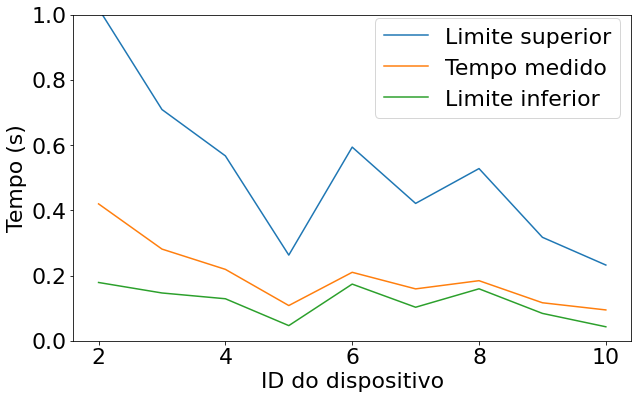

In [58]:
(devices_grouped.mean()['Time'] + ucb).plot()
devices_grouped.mean()['Time'].plot()
(devices_grouped.mean()['Time'] - lcb).plot()
plt.legend(['Limite superior', 'Tempo medido', 'Limite inferior'], bbox_to_anchor=(0.0,0.65,1,0))
plt.xlabel("ID do dispositivo")
plt.ylabel("Tempo (s)")
plt.ylim(0.0,1.0)
plt.savefig(img_folder+'medidas_tempo_dispositivos')
plt.show()

In [50]:
print(devices_grouped.agg({" Consumption": [np.mean, np.std, np.size]}))
stats = devices_grouped.agg({" Consumption": [np.mean, np.std, np.size]})
mean = stats[" Consumption"]["mean"].to_numpy()
std = stats[" Consumption"]["std"].to_numpy()
n = stats[" Consumption"]["size"].to_numpy()
se = std/np.sqrt(n)
z = 1.96
lcb = mean - z* se  #lower limit of the CI
ucb = mean + z* se 
print(lcb)
print(ucb)

           Consumption                
                  mean       std  size
Device ID                             
2             0.369385  0.025544  16.0
3             0.359685  0.022221  18.0
4             0.355333  0.017832  15.0
5             0.347568  0.005996  13.0
6             0.354701  0.022383  13.0
7             0.351143  0.013250  13.0
8             0.352903  0.017080   9.0
9             0.348165  0.007940   7.0
10            0.346626  0.003071   4.0
[0.35686879 0.34941976 0.34630865 0.34430827 0.34253329 0.3439406
 0.34174364 0.34228347 0.3436156 ]
[0.38190196 0.36995046 0.36435722 0.35082773 0.36686886 0.3583457
 0.3640617  0.35404681 0.3496354 ]


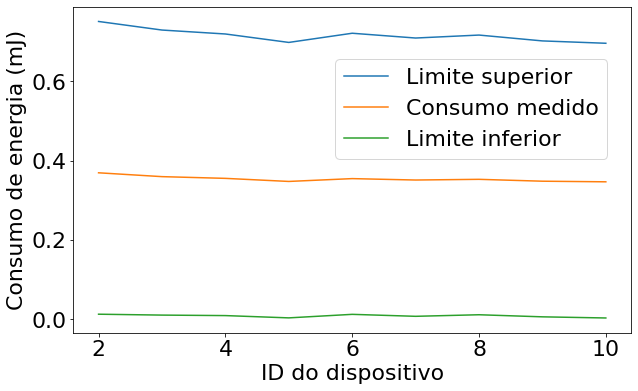

In [33]:
(devices_grouped.mean()[' Consumption'] + ucb).plot()
devices_grouped.mean()[' Consumption'].plot()
(devices_grouped.mean()[' Consumption'] - lcb).plot()
plt.legend(['Limite superior', 'Consumo medido', 'Limite inferior'], bbox_to_anchor=(0.45,0.5,1,0))
plt.xlabel("ID do dispositivo")
plt.ylabel("Consumo de energia (mJ)")
plt.savefig(img_folder+'medidas_consumo_dispositivos')

plt.show()

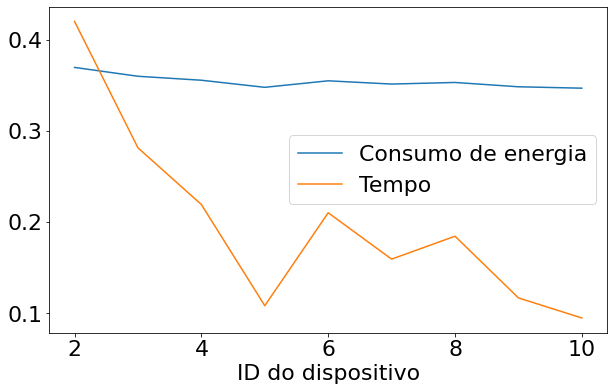

In [17]:
devices_grouped.mean()[' Consumption'].plot()
devices_grouped.mean()['Time'].plot()
plt.legend(["Consumo de energia", "Tempo"])
plt.xlabel("ID do dispositivo")
plt.savefig(img_folder+'medidas_consumo_tempo_dispositivos')
plt.show()

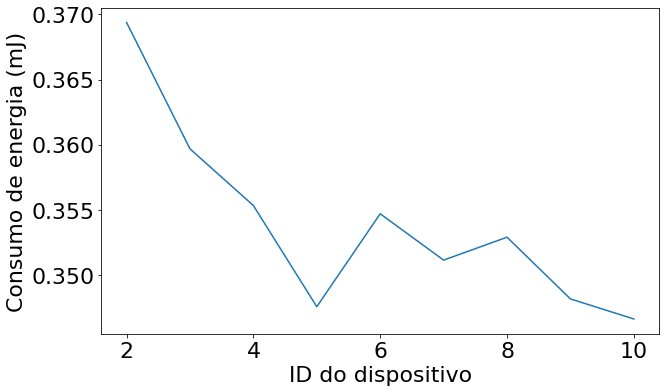

In [18]:
devices_grouped.mean()[' Consumption'].plot()
plt.xlabel("ID do dispositivo")
plt.ylabel("Consumo de energia (mJ)")
plt.savefig(img_folder+'medida_consumo_medio')
plt.show()

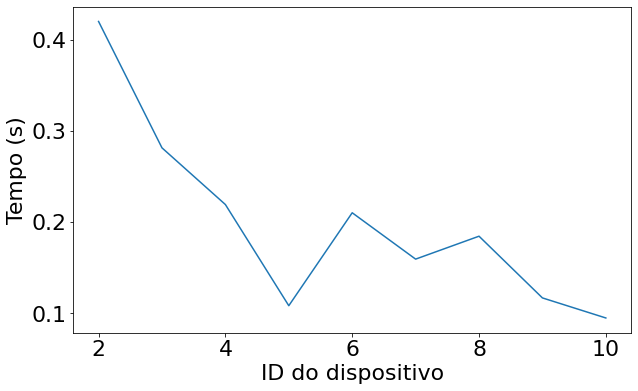

In [19]:
devices_grouped.mean()['Time'].plot()
plt.xlabel("ID do dispositivo")
plt.ylabel("Tempo (s)")
plt.savefig(img_folder+'medida_tempo_medio')
plt.show()

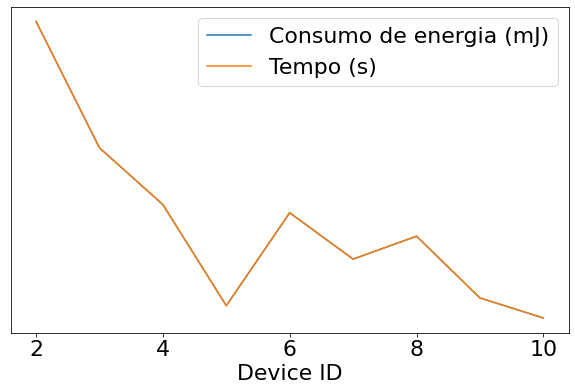

In [64]:
max_con=np.max(devices_grouped.mean()[' Consumption'])
min_con=np.min(devices_grouped.mean()[' Consumption'])
to_plot_con = (devices_grouped.mean()[' Consumption'] - min_con)/(max_con-min_con)
max_time=np.max(devices_grouped.mean()['Time'])
min_time=np.min(devices_grouped.mean()['Time'])
to_plot_time = (devices_grouped.mean()['Time'] - min_time)/(max_time-min_time)

(to_plot_con).plot()
(to_plot_time).plot()
plt.legend(["Consumo de energia (mJ)", "Tempo (s)"])
plt.yticks([])
plt.savefig(img_folder+"comportamento_curvas_tempo_energia")
plt.show()